# Preprocessing, Classification and Clustering

On this notebook is developed the preprocessing and the application of classification and clustering algorithms to film reviews.

In [1]:
import numpy as np
import pandas as pd
import random
import re
import nltk
from tabulate import tabulate
from bs4 import BeautifulSoup as bs

In [2]:
def extract_lines(corpus):
    X = list()
    y = list()
    for i in range(2, 4381):
        try:
            fname = corpus + str(i) + '.xml'
            with open(fname, 'r', encoding = 'latin-1') as rfile:
                content = rfile.readlines()
                content = "".join(content)
                bs_content = bs(content, "lxml")
                review = bs_content.find("review")
                rank = review.get("rank")
                y.append(int(rank))
            
            fname = corpus + str(i) + '.review.pos'
            with open(fname, 'r', encoding = 'latin-1') as rfile:
                content = rfile.readlines()
                review_pos_aux = list()
                              
                for line in content:
                    if line != '\n':
                        line_ls = line.split()
                        review_pos_aux.append(line_ls[1])
                X.append(' '.join(review_pos_aux))
            
        except IOError:
            #print("Could not read file:", fname)
            pass
    
    return X, y

In [3]:
def tokenize_lines_by_words(lines):
    new_lines = list()
    for line in lines:
        new_line = line.lower()
        new_lines.append(nltk.word_tokenize(new_line))
    
    return new_lines

In [4]:
def clean_alphabetic_text_lines(lines):
    new_lines = list()
    for line in lines:
        new_line = list()
        for word in line:
            token = list()
            for c in word:
                #[a-záéíóúñü+$]
                if re.match(r'^[a-záéíóúñü+$]', c):
                    token.append(c)
            token = ''.join(token)
            if token != '':
                new_line.append(token)
        new_lines.append(new_line)
        
    return new_lines

In [5]:
def remove_stop_words(lines):
    stopwords = nltk.corpus.stopwords.words('spanish')
    clean_lines = list()
    for line in lines:
        clean_line = list()
        for word in line:
            if word not in stopwords:
                clean_line.append(word)
        clean_lines.append(' '.join(clean_line))
    
    return clean_lines

In [6]:
def get_X_y(lines):
    X = list()
    y = list()
    for line in lines:
        n = len(line)
        tag = line.pop(n - 1)
        corpus = line
        X.append(corpus)
        y.append(tag)
    return [X, y]

In [7]:
def transform_tag(y):
    new_y = list()
    for i in y:
        if i == 'spam':
            new_i = 1
        else:
            new_i = 0
        new_y.append(new_i)
    return np.array(new_y)

In [8]:
X, y = extract_lines('./../corpusCriticasCine/corpusCriticasCine/')

In [9]:
len(X)

3878

In [10]:
len(y)

3878

In [11]:
tokenized_X = tokenize_lines_by_words(X)

In [12]:
new_X = clean_alphabetic_text_lines(tokenized_X)

In [13]:
clean_X = remove_stop_words(new_X)

In [14]:
data = list(zip(clean_X, y))

In [15]:
random.shuffle(data)

In [16]:
clean_X, y = zip(*data)

In [17]:
clean_X

('lamentablemente fuego cuerpo ser película erótico aderezar historia serie negro principiar publicitar alarde especulación informativo interesado ser excelente película serie negro afiliar sexo aureola clásico fatalismo reverso motor apostólico urdimbre narrativo tragedia arropar final metraje sorprender agradar ser marca género aportar nuevo kasdan inteligente director fino estilista mercado publicitario tomar aquí allí sketch apetecer tópico lugar común inventario accesible filmar desparpajo absoluto conocimiento medio cinematográfico obra personal hermoso pesea turner nunca ser santo devocionario aquí seducir conciso prudente personaje williamhurt papel abogado connivencia pecado carne femme fatal tan querer cine negro acabar perpretando previsible crimen recordar jacknicholson comer harina cartero siempre llamar vez bobrafelson garfield versión garnett hueco donjohnsondelabios ardiente encontrar antecedente ser hurt modo llevar palma quizá fiablemente representar rol sexo caer joh

In [18]:
y

(5,
 3,
 4,
 4,
 2,
 3,
 2,
 4,
 1,
 4,
 3,
 3,
 3,
 2,
 4,
 4,
 2,
 3,
 4,
 4,
 4,
 3,
 5,
 2,
 4,
 2,
 1,
 2,
 5,
 4,
 2,
 1,
 4,
 2,
 4,
 3,
 1,
 1,
 4,
 2,
 3,
 3,
 3,
 2,
 1,
 2,
 3,
 4,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 5,
 3,
 3,
 3,
 5,
 4,
 3,
 2,
 3,
 5,
 3,
 5,
 3,
 3,
 4,
 5,
 3,
 2,
 4,
 3,
 3,
 3,
 4,
 2,
 3,
 2,
 3,
 4,
 5,
 5,
 1,
 3,
 5,
 4,
 4,
 3,
 3,
 2,
 5,
 4,
 4,
 2,
 4,
 5,
 5,
 3,
 4,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 4,
 4,
 3,
 5,
 2,
 2,
 4,
 3,
 4,
 3,
 5,
 3,
 2,
 2,
 3,
 3,
 2,
 4,
 4,
 4,
 3,
 4,
 2,
 4,
 1,
 3,
 3,
 4,
 5,
 3,
 3,
 4,
 3,
 3,
 4,
 5,
 5,
 3,
 4,
 4,
 3,
 4,
 3,
 4,
 1,
 2,
 1,
 5,
 4,
 2,
 4,
 3,
 4,
 3,
 4,
 4,
 3,
 5,
 2,
 1,
 2,
 3,
 4,
 2,
 2,
 4,
 3,
 3,
 3,
 3,
 2,
 4,
 2,
 5,
 2,
 3,
 4,
 4,
 5,
 5,
 4,
 2,
 1,
 3,
 3,
 1,
 4,
 1,
 3,
 3,
 4,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 3,
 4,
 3,
 5,
 3,
 2,
 5,
 5,
 5,
 3,
 4,
 3,
 5,
 3,
 5,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 4,
 1,
 3,
 3,
 4,
 2,
 3,
 4,
 5,
 2,
 2,
 3,
 3,
 1,
 3,
 5,


In [19]:
set(y)

{1, 2, 3, 4, 5}

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [21]:
count_vect = CountVectorizer()

In [22]:
X_counts = count_vect.fit_transform(np.array(clean_X))

In [23]:
y = np.array(y)

In [24]:
X_counts.shape

(3878, 44980)

In [25]:
len(y)

3878

In [26]:
tfidf_transformer = TfidfTransformer()

In [27]:
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.2, random_state = 14)

# Logistic Regression

In [29]:
classifier = LogisticRegression()

In [30]:
classifier.fit(X_train, y_train)

LogisticRegression()

### Prediction of training data

In [31]:
y_pred = classifier.predict(X_train)

In [32]:
classifier.score(X_train, y_train)

0.9026434558349452

In [33]:
print(metrics.confusion_matrix(y_train, y_pred))

[[159  66  46   4   0]
 [  0 688  30   2   0]
 [  0   1 994   5   0]
 [  0   3  46 673   0]
 [  0   5  59  35 286]]


In [34]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.58      0.73       275
           2       0.90      0.96      0.93       720
           3       0.85      0.99      0.91      1000
           4       0.94      0.93      0.93       722
           5       1.00      0.74      0.85       385

    accuracy                           0.90      3102
   macro avg       0.94      0.84      0.87      3102
weighted avg       0.91      0.90      0.90      3102



### Prediction of test data

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
classifier.score(X_test, y_test)

0.4484536082474227

In [37]:
print(metrics.confusion_matrix(y_test, y_pred))

[[  7  49  17   3   0]
 [  3  96  92  11   1]
 [  0  34 181  38   0]
 [  0  10  98  59   1]
 [  0   5  34  32   5]]


In [38]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.70      0.09      0.16        76
           2       0.49      0.47      0.48       203
           3       0.43      0.72      0.54       253
           4       0.41      0.35      0.38       168
           5       0.71      0.07      0.12        76

    accuracy                           0.45       776
   macro avg       0.55      0.34      0.34       776
weighted avg       0.50      0.45      0.41       776



# Multinomial NB

In [39]:
classifier = MultinomialNB()

In [40]:
classifier.fit(X_train, y_train)

MultinomialNB()

### Prediction of training data

In [41]:
y_pred = classifier.predict(X_train)

In [42]:
classifier.score(X_train, y_train)

0.32978723404255317

In [43]:
print(metrics.confusion_matrix(y_train, y_pred))

[[   1    0  274    0    0]
 [   0   11  709    0    0]
 [   0    0 1000    0    0]
 [   0    0  711   11    0]
 [   0    0  385    0    0]]


In [44]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.00      0.01       275
           2       1.00      0.02      0.03       720
           3       0.32      1.00      0.49      1000
           4       1.00      0.02      0.03       722
           5       0.00      0.00      0.00       385

    accuracy                           0.33      3102
   macro avg       0.66      0.21      0.11      3102
weighted avg       0.66      0.33      0.17      3102



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Prediction of test data

In [45]:
y_pred = classifier.predict(X_test)

In [46]:
classifier.score(X_test, y_test)

0.32603092783505155

In [47]:
print(metrics.confusion_matrix(y_test, y_pred))

[[  0   0  76   0   0]
 [  0   0 203   0   0]
 [  0   0 253   0   0]
 [  0   0 168   0   0]
 [  0   0  76   0   0]]


In [48]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        76
           2       0.00      0.00      0.00       203
           3       0.33      1.00      0.49       253
           4       0.00      0.00      0.00       168
           5       0.00      0.00      0.00        76

    accuracy                           0.33       776
   macro avg       0.07      0.20      0.10       776
weighted avg       0.11      0.33      0.16       776



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K-means

In [49]:
classifier = KMeans(n_clusters = 5)

In [50]:
classifier.fit(X_train)

KMeans(n_clusters=5)

In [51]:
data = X_train
sse = dict()
res = list()
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    res.append(kmeans.labels_)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

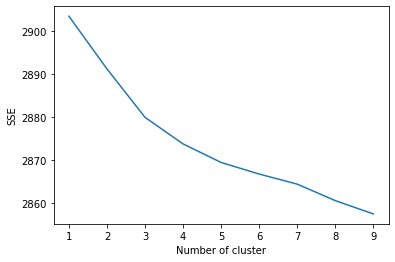

In [52]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### Prediction of training data (5 clusters)

In [53]:
y_pred = classifier.predict(X_train)

In [54]:
ls_clusters = sorted(list(set(y_pred)))
dict_clusters = {key: np.sum(y_pred == key) / len(y_pred) for key in ls_clusters}
dict_clusters_sorted = dict(sorted(dict_clusters.items(), key=lambda item: item[1]))
dict_clusters_sorted_keys = list(dict_clusters_sorted.keys())

In [55]:
dict_clusters_sorted

{3: 0.049000644745325596,
 0: 0.06382978723404255,
 2: 0.07027724049000644,
 4: 0.3452611218568665,
 1: 0.4716312056737589}

In [56]:
ls_y = sorted(list(set(y_train)))
dict_y = {key: np.sum(y_train == key) / len(y_train) for key in ls_y}
dict_y_sorted = dict(sorted(dict_y.items(), key=lambda item: item[1]))
dict_y_sorted_keys = list(dict_y_sorted.keys())

In [57]:
dict_y_sorted

{1: 0.08865248226950355,
 5: 0.12411347517730496,
 2: 0.23210831721470018,
 4: 0.2327530625402966,
 3: 0.3223726627981947}

In [58]:
dict_map_clusters_y = {dict_clusters_sorted_keys[i]: dict_y_sorted_keys[i] for i in range(len(dict_y_sorted_keys))}

In [59]:
dict_map_clusters_y

{3: 1, 0: 5, 2: 2, 4: 4, 1: 3}

In [60]:
def reorder_labels(i):
    return dict_map_clusters_y[i]

In [61]:
# Adjustment to labels of data
y_pred_aux = np.array(list(map(reorder_labels, y_pred)))

In [62]:
classifier.score(X_train)

-2869.031345950421

In [63]:
print(metrics.confusion_matrix(y_train, y_pred_aux))

[[  6  23 100 127  19]
 [ 32  69 307 263  49]
 [ 44  74 494 319  69]
 [ 43  37 365 244  33]
 [ 27  15 197 118  28]]


In [64]:
print(metrics.classification_report(y_train, y_pred_aux))

              precision    recall  f1-score   support

           1       0.04      0.02      0.03       275
           2       0.32      0.10      0.15       720
           3       0.34      0.49      0.40      1000
           4       0.23      0.34      0.27       722
           5       0.14      0.07      0.10       385

    accuracy                           0.27      3102
   macro avg       0.21      0.20      0.19      3102
weighted avg       0.26      0.27      0.24      3102



### Prediction of test data (5 clusters)

In [65]:
y_pred = classifier.predict(X_test)

In [66]:
y_pred

array([3, 4, 1, 4, 1, 4, 1, 1, 4, 0, 2, 4, 4, 4, 4, 3, 2, 4, 2, 1, 1, 1,
       1, 1, 0, 4, 4, 3, 1, 1, 1, 1, 1, 4, 1, 3, 4, 1, 1, 3, 4, 1, 1, 1,
       1, 4, 4, 0, 2, 2, 1, 4, 2, 1, 4, 4, 4, 4, 4, 4, 1, 1, 4, 1, 1, 1,
       4, 4, 1, 3, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 1, 3, 1, 2, 4, 2, 1, 1,
       4, 1, 1, 1, 1, 4, 4, 1, 2, 1, 1, 4, 1, 4, 1, 3, 2, 3, 1, 3, 3, 4,
       4, 4, 4, 4, 4, 1, 1, 3, 1, 1, 4, 1, 4, 1, 1, 1, 4, 1, 3, 4, 4, 1,
       4, 1, 1, 0, 4, 3, 0, 1, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 4, 2, 4,
       1, 3, 4, 4, 2, 1, 4, 2, 1, 2, 1, 4, 1, 1, 3, 1, 4, 1, 3, 3, 4, 1,
       4, 4, 1, 4, 1, 3, 2, 1, 1, 1, 0, 4, 1, 4, 1, 0, 4, 4, 4, 1, 4, 4,
       1, 4, 0, 0, 4, 2, 4, 4, 1, 3, 4, 4, 1, 4, 1, 1, 2, 4, 0, 1, 2, 1,
       4, 4, 1, 4, 1, 4, 4, 3, 1, 1, 4, 1, 1, 1, 4, 1, 3, 1, 4, 1, 1, 0,
       4, 4, 4, 4, 1, 1, 1, 4, 4, 1, 4, 1, 1, 2, 1, 4, 4, 3, 2, 1, 1, 1,
       1, 3, 1, 1, 4, 3, 1, 1, 4, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 4, 1, 3,
       4, 1, 1, 4, 0, 2, 4, 1, 1, 4, 3, 2, 1, 4, 2,

In [67]:
# Adjustment to labels of data
y_pred_aux = np.array(list(map(reorder_labels, y_pred)))

In [68]:
classifier.score(X_test)

-720.4443511554163

In [69]:
print(metrics.confusion_matrix(y_test, y_pred_aux))

[[  5  11  30  22   8]
 [  7  16 100  68  12]
 [ 17  19 112  91  14]
 [  8  11  92  49   8]
 [  5   1  43  23   4]]


In [70]:
print(metrics.classification_report(y_test, y_pred_aux))

              precision    recall  f1-score   support

           1       0.12      0.07      0.08        76
           2       0.28      0.08      0.12       203
           3       0.30      0.44      0.36       253
           4       0.19      0.29      0.23       168
           5       0.09      0.05      0.07        76

    accuracy                           0.24       776
   macro avg       0.19      0.19      0.17       776
weighted avg       0.23      0.24      0.21       776

